# TEAM 44 - HCC Survival (U05) - kdd cyberattack (K09)

## Part 1: UCI dataset

### Install the required libraries

In [1]:
%pip install pip --upgrade
%pip install scikit-learn --upgrade
%pip install numpy --upgrade
%pip install matplotlib --upgrade
%pip install imbalanced-learn --upgrade
%pip install pandas --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Intoduction and Overview

For this part we will use a UCI dataset, [HCC Survival](https://archive.ics.uci.edu/ml/datasets/HCC+Survival).

HCC dataset was obtained at a University Hospital in Portugal and contais several demographic, risk factors, laboratory and overall survival features of 165 real patients diagnosed with HCC. The dataset contains 49 features selected according to the EASL-EORTC (European Association for the Study of the Liver - European Organisation for Research and Treatment of Cancer) Clinical Practice Guidelines, which are the current state-of-the-art on the management of HCC.

This is an heterogeneous dataset, with 23 quantitative variables, and 26 qualitative variables. Overall, missing data represents 10.22% of the whole dataset and only eight patients have complete information in all fields (4.85%). The target variables is the survival at 1 year, and was encoded as a binary variable: 0 (dies) and 1 (lives). A certain degree of class-imbalance is also present (63 cases labeled as dies and 102 as lives).

In [2]:
import time
import pandas as pd
import numpy as np

# get hcc_data.txt file
!wget -q http://archive.ics.uci.edu/ml/machine-learning-databases/00423/hcc-survival.zip -P resources
!unzip -q resources/hcc-survival.zip -d resources
!rm resources/hcc-survival.zip
!rm -r resources/__MACOSX
!mv resources/hcc-survival/hcc-data.txt resources/hcc-data.txt
!mv resources/hcc-survival/hcc-description.txt resources/hcc-description.txt
!rm -r resources/hcc-survival

# read data from hcc_data.txt file and replace missing values with NaN
df = pd.read_csv("resources/hcc-data.txt", header=None, na_values = "?")

# print basic info about dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       165 non-null    int64  
 1   1       147 non-null    float64
 2   2       165 non-null    int64  
 3   3       148 non-null    float64
 4   4       126 non-null    float64
 5   5       141 non-null    float64
 6   6       156 non-null    float64
 7   7       165 non-null    int64  
 8   8       126 non-null    float64
 9   9       124 non-null    float64
 10  10      162 non-null    float64
 11  11      155 non-null    float64
 12  12      142 non-null    float64
 13  13      162 non-null    float64
 14  14      163 non-null    float64
 15  15      151 non-null    float64
 16  16      143 non-null    float64
 17  17      113 non-null    float64
 18  18      150 non-null    float64
 19  19      154 non-null    float64
 20  20      162 non-null    float64
 21  21      161 non-null    float64
 22  22

The only transformation applied to the original dataset was the replacement of missing values (denoted by "?") by NaN value, using the pandas.read_csv function with the na_values parameter.

There are 165 instances and 49 features in the dataset. The type of the features are as follows.

* Gender: nominal
* Symptoms: nominal
* Alcohol: nominal
* Hepatitis B Surface Antigen: nominal
* Hepatitis B e Antigen: nominal
* Hepatitis B Core Antibody: nominal
* Hepatitis C Virus Antibody: nominal
* Cirrhosis : nominal
* Endemic Countries: nominal
* Smoking: nominal
* Diabetes: nominal
* Obesity: nominal
* Hemochromatosis: nominal
* Arterial Hypertension: nominal
* Chronic Renal Insufficiency: nominal
* Human Immunodeficiency Virus: nominal
* Nonalcoholic Steatohepatitis: nominal
* Esophageal Varices: nominal
* Splenomegaly: nominal
* Portal Hypertension: nominal
* Portal Vein Thrombosis: nominal
* Liver Metastasis: nominal
* Radiological Hallmark: nominal
* Age at diagnosis: integer
* Grams of Alcohol per day: continuous
* Packs of cigarets per year: continuous
* Performance Status: ordinal
* Encefalopathy degree: ordinal
* Ascites degree: ordinal
* International Normalised Ratio: continuous
* Alpha-Fetoprotein (ng/mL): continuous
* Haemoglobin (g/dL): continuous
* Mean Corpuscular Volume (fl): continuous
* Leukocytes(G/L): continuous
* Platelets (G/L): continuous
* Albumin (mg/dL): continuous
* Total Bilirubin(mg/dL): continuous
* Alanine transaminase (U/L): continuous
* Aspartate transaminase (U/L): continuous
* Gamma glutamyl transferase (U/L): continuous
* Alkaline phosphatase (U/L): continuous
* Total Proteins (g/dL): continuous
* Creatinine (mg/dL): continuous
* Number of Nodules: integer
* Major dimension of nodule (cm): continuous
* Direct Bilirubin (mg/dL): continuous
* Iron (mcg/dL): continuous
* Oxygen Saturation (%): continuous
* Ferritin (ng/mL): continuous

All the nominal features (the first 23) are not ordinal features.

There are no labels for the features, and no row indexing.

The last column (50th) is the label of the classes, which is the survival at 1 year, and was encoded as a binary variable: 0 (dies) and 1 (lives).

In [3]:
# slice the dataframe to split the features from the labels
labels_df = df.iloc[:, [49]]
labels = labels_df.values.reshape(165)
features_df = df.iloc[:, 0:49]
features = features_df.values

print(f'Number of instances with missing values: {features_df.isnull().values.any(axis=1).sum()}')
print(f'Percentage of instances with missing values: {np.format_float_positional(features_df.isnull().values.any(axis=1).sum()/features_df.shape[0]*100, 2)}%')
print(f'Percentage of missing values to total number of values: {np.format_float_positional(features_df.isnull().values.sum()/features_df.size*100, 2)}%')

print(f'Class frequencies: {np.bincount(labels)}')
print(f'Percentage of negative instances: {np.format_float_positional(np.bincount(labels)[0]/labels.shape[0]*100, 2)}%')
print(f'Percentage of positive instances: {np.format_float_positional(np.bincount(labels)[1]/labels.shape[0]*100, 2)}%')
print(f'Class frequency ratio: {np.format_float_positional(np.max(np.bincount(labels))/np.min(np.bincount(labels)), 2)}')

Number of instances with missing values: 157
Percentage of instances with missing values: 95.15%
Percentage of missing values to total number of values: 10.22%
Class frequencies: [ 63 102]
Percentage of negative instances: 38.18%
Percentage of positive instances: 61.82%
Class frequency ratio: 1.62


There are missing values. The number of instances with missing values is 157, and their percentage with respect to total number of instances is 95.15%. The missing data represents 10.22% of the whole dataset.

There are 63 cases labeled as dies and 102 as lives, with 38.18% and 61.82% respectively. This is a class-imbalanced binary dataset, as the 60%-40% ratio is not respected, as showcased by the class frequency ratio with a value over 1.5.

### Preparation

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [5]:
from sklearn.impute import SimpleImputer
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp2 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp3 = SimpleImputer(missing_values=np.nan, strategy='median')

mask1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26, 27, 28]
mask2 = [24, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48]
mask3 = [23, 43]
imp1.fit(X_train[:, mask1])
imp2.fit(X_train[:, mask2])
imp3.fit(X_train[:, mask3])

X_train[:, mask1] = imp1.transform(X_train[:, mask1])
X_train[:, mask2] = imp2.transform(X_train[:, mask2])
X_train[:, mask3] = imp3.transform(X_train[:, mask3])
X_test[:, mask1] = imp1.transform(X_test[:, mask1])
X_test[:, mask2] = imp2.transform(X_test[:, mask2])
X_test[:, mask3] = imp3.transform(X_test[:, mask3])

For the missing values we will use the SimpleImputer class from the sklearn.impute module. We will use the most frequent and the mean strategy. The most frequent strategy replaces missing values using the most frequent value along each column, while the mean strategy replaces missing values using the mean value along each column.

We used the most frequent strategy on the nominal, integer and ordinal features, where mean value would not be acceptable, and the mean strategy on the continuous features.

In [6]:
train_data = pd.DataFrame(X_train)
test_data = pd.DataFrame(X_test)

# concat the train and test data and create dummy features for the nominal ones
data = pd.concat([train_data, test_data], axis=0)
data = pd.get_dummies(data, columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

# split the data to train and test again with 70-30 ratio
X_train = data.iloc[0:115, :].values
X_test = data.iloc[115:165, :].values

print(f'Number of samples and features of X_train data: {X_train.shape}')
print(f'Number of samples and features of X_test data: {X_test.shape}')

Number of samples and features of X_train data: (115, 72)
Number of samples and features of X_test data: (50, 72)


For the nominal features we will use the get_dummies function from the pandas module. This function is used to convert categorical variable into dummy/indicator variables.

We had to concat the train and test data so that the dummy/indicator variables end up being the same for both sets. We then split the data back into train and test sets, following the initial 70-30 ratio.

### Classification

#### Out of the box

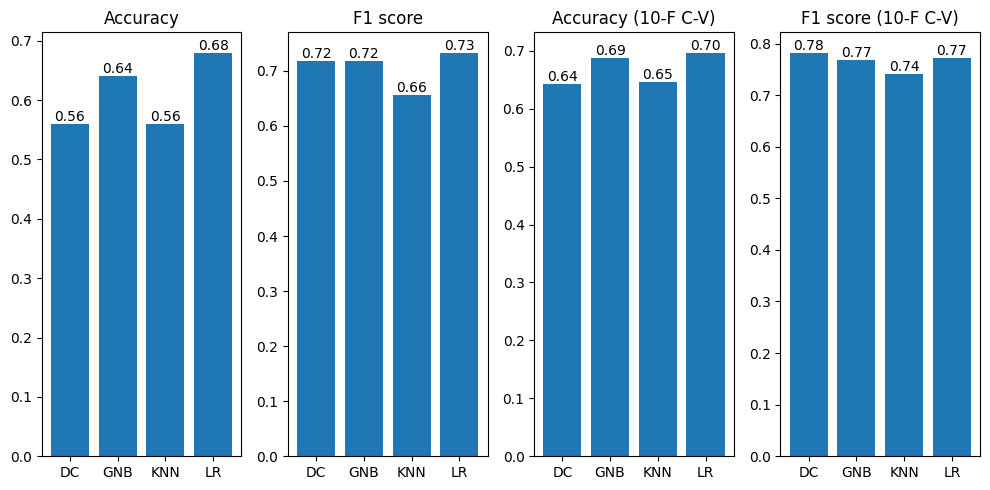

In [7]:
# ignore logistic regression convergence warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# classifiers
DC = DummyClassifier()
GNB = GaussianNB()
KNN = KNeighborsClassifier()
LR = LogisticRegression()

# fit the classifiers
DC.fit(X_train, y_train)
GNB.fit(X_train, y_train)
KNN.fit(X_train, y_train)
LR.fit(X_train, y_train)

# predict
y_pred_DC = DC.predict(X_test)
y_pred_GNB = GNB.predict(X_test)
y_pred_KNN = KNN.predict(X_test)
y_pred_LR = LR.predict(X_test)

# accuracy
hcc_accuracy = {}
hcc_accuracy['DC'] = accuracy_score(y_test, y_pred_DC)
hcc_accuracy['GNB'] = accuracy_score(y_test, y_pred_GNB)
hcc_accuracy['KNN'] = accuracy_score(y_test, y_pred_KNN)
hcc_accuracy['LR'] = accuracy_score(y_test, y_pred_LR)

# f1 score
hcc_f1 = {}
hcc_f1['DC'] = f1_score(y_test, y_pred_DC)
hcc_f1['GNB'] = f1_score(y_test, y_pred_GNB)
hcc_f1['KNN'] = f1_score(y_test, y_pred_KNN)
hcc_f1['LR'] = f1_score(y_test, y_pred_LR)

# bar plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.bar(range(len(hcc_accuracy)), list(hcc_accuracy.values()), align='center')
plt.xticks(range(len(hcc_accuracy)), list(hcc_accuracy.keys()))
plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.title('Accuracy')

# bar plot f1 score
plt.subplot(1, 4, 2)
plt.bar(range(len(hcc_f1)), list(hcc_f1.values()), align='center')
plt.xticks(range(len(hcc_f1)), list(hcc_f1.keys()))
plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.title('F1 score')

# 10-fold cross validation
hcc_accuracy_cv = {}
hcc_accuracy_cv['DC'] = cross_val_score(DC, X_train, y_train, cv=10, scoring='accuracy').mean()
hcc_accuracy_cv['GNB'] = cross_val_score(GNB, X_train, y_train, cv=10, scoring='accuracy').mean()
hcc_accuracy_cv['KNN'] = cross_val_score(KNN, X_train, y_train, cv=10, scoring='accuracy').mean()
hcc_accuracy_cv['LR'] = cross_val_score(LR, X_train, y_train, cv=10, scoring='accuracy').mean()

hcc_f1_cv = {}
hcc_f1_cv['DC'] = cross_val_score(DC, X_train, y_train, cv=10, scoring='f1').mean()
hcc_f1_cv['GNB'] = cross_val_score(GNB, X_train, y_train, cv=10, scoring='f1').mean()
hcc_f1_cv['KNN'] = cross_val_score(KNN, X_train, y_train, cv=10, scoring='f1').mean()
hcc_f1_cv['LR'] = cross_val_score(LR, X_train, y_train, cv=10, scoring='f1').mean()

# bar plot cross validation accuracy
plt.subplot(1, 4, 3)
plt.bar(range(len(hcc_accuracy_cv)), list(hcc_accuracy_cv.values()), align='center')
plt.xticks(range(len(hcc_accuracy_cv)), list(hcc_accuracy_cv.keys()))
plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.title('Accuracy (10-F C-V)')

# bar plot cross validation f1 score
plt.subplot(1, 4, 4)
plt.bar(range(len(hcc_f1_cv)), list(hcc_f1_cv.values()), align='center')
plt.xticks(range(len(hcc_f1_cv)), list(hcc_f1_cv.keys()))
plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.title('F1 score (10-F C-V)')
plt.tight_layout()
plt.show()


Classifier | Accuracy | F1 score | Accuracy (10-Fold Cross-Validation) | F1 score (10-Fold Cross-Validation) 
---|---|---|---|---
Dummy Classifier | 0.56 | 0.72 | 0.64 | 0.78
Gaussian Naive Bayes | 0.64 | 0.72 | 0.69 | 0.77
K-Nearest Neighbors | 0.56 | 0.66 | 0.65 | 0.74
Logistic Regression | 0.70 | 0.75 | 0.70 | 0.77

#### Optimization

##### Imports, Initializations and Feature Variance

In [37]:
# imports and transformers initialization
import time
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score

selector = VarianceThreshold()
standard = StandardScaler()
min_max = MinMaxScaler()
ros = RandomOverSampler()
rus = RandomUnderSampler()
pca = PCA()

In [8]:
# check variance to select vthreshold values
train_variance = X_train.var(axis=0)
print(f'- Train data feature variance: \n {train_variance}')
print(f'--------------------------------------------------------------------------------')
print(f'- Minimum, maximum, mean and median variance:')
print(f'{np.min(train_variance)}, {np.max(train_variance)}, {np.mean(train_variance)}, {np.median(train_variance)}')

- Train data feature variance: 
 [1.64624877e+02 3.05626153e+03 2.40905482e+03 1.31901701e+00
 1.95841210e-01 4.38109641e-01 2.26191276e-01 2.97372702e+10
 4.26148758e+00 6.67759503e+01 7.83600146e+06 1.17003133e+10
 4.66437542e-01 3.09651575e+01 3.88658315e+03 8.74963408e+03
 7.25871759e+04 2.20287249e+04 4.51130837e+01 7.72392482e-01
 3.11107750e+00 2.39464855e+01 1.47037101e+01 1.63326985e+03
 3.89578659e+02 9.71297112e+04 1.37920605e-01 1.37920605e-01
 2.21247637e-01 2.21247637e-01 1.88582231e-01 1.88582231e-01
 9.34593573e-02 9.34593573e-02 0.00000000e+00 0.00000000e+00
 1.74971645e-01 1.74971645e-01 1.60000000e-01 1.60000000e-01
 8.65028355e-02 8.65028355e-02 6.47258979e-02 6.47258979e-02
 2.29413989e-01 2.29413989e-01 2.24120983e-01 2.24120983e-01
 1.06918715e-01 1.06918715e-01 4.15879017e-02 4.15879017e-02
 2.24120983e-01 2.24120983e-01 7.93950851e-02 7.93950851e-02
 2.54064272e-02 2.54064272e-02 4.94517958e-02 4.94517958e-02
 1.70132325e-01 1.70132325e-01 2.41663516e-01 2.4166

##### Gaussian Naive Bayes

In [94]:
# initialize pipeline and grid search for accuracy
pipe_acc = Pipeline(steps=[('selector', selector), ('scaler', standard), ('sampler', ros), ('pca', pca), ('classifier', GNB)], memory='tmp')
vthreshold_acc = [0.17, 0.18, 0.2, 0.21]
n_components_acc = [10, 12, 13, 14, 16, 18]
var_smoothing_acc = [0, 1e-9, 1]

estimator_acc = GridSearchCV(pipe_acc, dict(selector__threshold=vthreshold_acc, pca__n_components=n_components_acc, classifier__var_smoothing=var_smoothing_acc), cv=10, scoring='accuracy', n_jobs=-1)
estimator_acc.fit(X_train, y_train)

# print top 9 results
results = pd.DataFrame(estimator_acc.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results[['mean_test_score', 'params']]

for i in range(9):
    print(f'accuracy: {np.format_float_positional(results.iloc[i, 0], 4)}, vthreshold: {results.iloc[i, 1]["selector__threshold"]}, n_components: {results.iloc[i, 1]["pca__n_components"]}, var_smoothing: {results.iloc[i, 1]["classifier__var_smoothing"]}')

accuracy: 0.7727, vthreshold: 0.2, n_components: 12, var_smoothing: 1e-09
accuracy: 0.7727, vthreshold: 0.2, n_components: 12, var_smoothing: 0
accuracy: 0.7553, vthreshold: 0.2, n_components: 10, var_smoothing: 0
accuracy: 0.7553, vthreshold: 0.2, n_components: 13, var_smoothing: 1e-09
accuracy: 0.7553, vthreshold: 0.2, n_components: 10, var_smoothing: 1e-09
accuracy: 0.7553, vthreshold: 0.2, n_components: 13, var_smoothing: 0
accuracy: 0.7477, vthreshold: 0.21, n_components: 12, var_smoothing: 1e-09
accuracy: 0.7477, vthreshold: 0.21, n_components: 12, var_smoothing: 0
accuracy: 0.7462, vthreshold: 0.2, n_components: 14, var_smoothing: 1e-09


In [95]:
# initialize pipeline and grid search for f1 score
pipe_f1 = Pipeline(steps=[('selector', selector), ('scaler', standard), ('sampler', ros), ('pca', pca), ('classifier', GNB)], memory='tmp')
vthreshold_f1 = [0.2, 1.1, 1.11, 1.12]
n_components_f1 = [10, 11, 12, 19, 20]
var_smoothing_f1 = [1]

estimator_f1 = GridSearchCV(pipe_f1, dict(selector__threshold=vthreshold_f1, pca__n_components=n_components_f1, classifier__var_smoothing=var_smoothing_f1), cv=10, scoring='f1', n_jobs=-1)
estimator_f1.fit(X_train, y_train)

# print top 9 results
results = pd.DataFrame(estimator_f1.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results[['mean_test_score', 'params']]

for i in range(9):
    print(f'accuracy: {np.format_float_positional(results.iloc[i, 0], 4)}, vthreshold: {results.iloc[i, 1]["selector__threshold"]}, n_components: {results.iloc[i, 1]["pca__n_components"]}, var_smoothing: {results.iloc[i, 1]["classifier__var_smoothing"]}')

accuracy: 0.8086, vthreshold: 1.12, n_components: 20, var_smoothing: 1
accuracy: 0.8086, vthreshold: 1.11, n_components: 20, var_smoothing: 1
accuracy: 0.8086, vthreshold: 1.1, n_components: 20, var_smoothing: 1
accuracy: 0.8086, vthreshold: 1.12, n_components: 19, var_smoothing: 1
accuracy: 0.8086, vthreshold: 1.11, n_components: 19, var_smoothing: 1
accuracy: 0.8086, vthreshold: 1.1, n_components: 19, var_smoothing: 1
accuracy: 0.8052, vthreshold: 1.1, n_components: 12, var_smoothing: 1
accuracy: 0.8052, vthreshold: 1.12, n_components: 12, var_smoothing: 1
accuracy: 0.8052, vthreshold: 1.11, n_components: 12, var_smoothing: 1


In [103]:
for estimator, scoring in [(estimator_acc, "accuracy"), (estimator_f1, "F1 score")]:
    # print best estimator
    print(f'- Gaussian Naive Bayes model selection based on {scoring}')
    print(f'Best estimator: {estimator.best_estimator_}')
    print(f'{scoring.capitalize()} (10-Fold Cross-Validation): {np.format_float_positional(estimator.best_score_, 2)}')
    
    # print fit and predict times
    start = time.time()
    estimator.best_estimator_.fit(X_train, y_train)
    end = time.time()
    print(f'Time to fit: {np.format_float_positional(end - start, 5)} sec')

    start = time.time()
    y_preds = estimator.best_estimator_.predict(X_test)
    end = time.time()
    print(f'Time to predict: {np.format_float_positional(end - start, 5)} sec')

    # print best estimator accuracy and f1 score on test data
    print(f'Accuracy: {np.format_float_positional(accuracy_score(y_test, y_preds), 2)}')
    print(f'F1 score: {np.format_float_positional(f1_score(y_test, y_preds), 2)}')

    if estimator != estimator_f1:
        print(f'--------------------------------------------------------------------------------')

- Gaussian Naive Bayes model selection based on accuracy
Best estimator: Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=11)),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])
Accuracy (10-Fold Cross-Validation): 0.78
Time to fit: 0.00802 sec
Time to predict: 0.00043 sec
Accuracy: 0.68
F1 score: 0.70
--------------------------------------------------------------------------------
- Gaussian Naive Bayes model selection based on F1 score
Best estimator: Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=11)),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])
F1 score (1

##### K-Nearest Neighbors

In [97]:
# initialize pipeline and grid search for accuracy
pipe_acc = Pipeline(steps=[('selector', selector), ('scaler', standard), ('sampler', ros), ('pca', pca), ('classifier', KNN)], memory='tmp')
vthreshold_acc = [0.42, 0.43, 0.44]
n_components_acc = [5]
k_neighbors_acc = [60, 63]
weights_acc = ['distance']
metric_acc = ['minkowski', 'euclidean']

estimator_acc = GridSearchCV(pipe_acc, dict(selector__threshold=vthreshold_acc, pca__n_components=n_components_acc, classifier__n_neighbors=k_neighbors_acc, classifier__weights=weights_acc, classifier__metric=metric_acc), cv=10, scoring='accuracy', n_jobs=-1)
estimator_acc.fit(X_train, y_train)

# print top 9 results
results = pd.DataFrame(estimator_acc.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results[['mean_test_score', 'params']]

for i in range(9):
    print(f'accuracy: {np.format_float_positional(results.iloc[i, 0], 4)}, vthreshold: {results.iloc[i, 1]["selector__threshold"]}, n_components: {results.iloc[i, 1]["pca__n_components"]}, n_neighbors: {results.iloc[i, 1]["classifier__n_neighbors"]}, weights: {results.iloc[i, 1]["classifier__weights"]}, metric: {results.iloc[i, 1]["classifier__metric"]}')

accuracy: 0.8106, vthreshold: 0.42, n_components: 5, n_neighbors: 60, weights: distance, metric: minkowski
accuracy: 0.8106, vthreshold: 0.43, n_components: 5, n_neighbors: 60, weights: distance, metric: minkowski
accuracy: 0.8106, vthreshold: 0.42, n_components: 5, n_neighbors: 60, weights: distance, metric: euclidean
accuracy: 0.8106, vthreshold: 0.43, n_components: 5, n_neighbors: 60, weights: distance, metric: euclidean
accuracy: 0.8030, vthreshold: 0.42, n_components: 5, n_neighbors: 63, weights: distance, metric: minkowski
accuracy: 0.8030, vthreshold: 0.43, n_components: 5, n_neighbors: 63, weights: distance, metric: minkowski
accuracy: 0.8030, vthreshold: 0.42, n_components: 5, n_neighbors: 63, weights: distance, metric: euclidean
accuracy: 0.8030, vthreshold: 0.43, n_components: 5, n_neighbors: 63, weights: distance, metric: euclidean
accuracy: 0.7932, vthreshold: 0.44, n_components: 5, n_neighbors: 63, weights: distance, metric: minkowski


In [98]:
# initialize pipeline and grid search for f1 score
pipe_f1 = Pipeline(steps=[('selector', selector), ('scaler', standard), ('sampler', ros), ('pca', pca), ('classifier', KNN)], memory='tmp')
vthreshold_f1 = [0.58, 0.59, 0.6, 0.61]
n_components_f1 = [5]
k_neighbors_f1 = [68, 69, 70]
weights_f1 = ['distance']
metric_f1 = ['minkowski', 'euclidean']

estimator_f1 = GridSearchCV(pipe_f1, dict(selector__threshold=vthreshold_f1, pca__n_components=n_components_f1, classifier__n_neighbors=k_neighbors_f1, classifier__weights=weights_f1, classifier__metric=metric_f1), cv=10, scoring='f1', n_jobs=-1)
estimator_f1.fit(X_train, y_train)

# print top 9 results
results = pd.DataFrame(estimator_f1.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results[['mean_test_score', 'params']]

for i in range(9):
    print(f'accuracy: {np.format_float_positional(results.iloc[i, 0], 4)}, vthreshold: {results.iloc[i, 1]["selector__threshold"]}, n_components: {results.iloc[i, 1]["pca__n_components"]}, n_neighbors: {results.iloc[i, 1]["classifier__n_neighbors"]}, weights: {results.iloc[i, 1]["classifier__weights"]}, metric: {results.iloc[i, 1]["classifier__metric"]}')

accuracy: 0.8466, vthreshold: 0.61, n_components: 5, n_neighbors: 69, weights: distance, metric: euclidean
accuracy: 0.8466, vthreshold: 0.6, n_components: 5, n_neighbors: 69, weights: distance, metric: euclidean
accuracy: 0.8466, vthreshold: 0.58, n_components: 5, n_neighbors: 69, weights: distance, metric: minkowski
accuracy: 0.8466, vthreshold: 0.59, n_components: 5, n_neighbors: 69, weights: distance, metric: minkowski
accuracy: 0.8466, vthreshold: 0.6, n_components: 5, n_neighbors: 69, weights: distance, metric: minkowski
accuracy: 0.8466, vthreshold: 0.61, n_components: 5, n_neighbors: 69, weights: distance, metric: minkowski
accuracy: 0.8466, vthreshold: 0.59, n_components: 5, n_neighbors: 69, weights: distance, metric: euclidean
accuracy: 0.8466, vthreshold: 0.58, n_components: 5, n_neighbors: 69, weights: distance, metric: euclidean
accuracy: 0.8416, vthreshold: 0.58, n_components: 5, n_neighbors: 68, weights: distance, metric: minkowski


In [104]:
for estimator, scoring in [(estimator_acc, "accuracy"), (estimator_f1, "F1 score")]:
    # print best estimator
    print(f'- K-Nearest Neighbors model selection based on {scoring}')
    print(f'Best estimator: {estimator.best_estimator_}')
    print(f'{scoring.capitalize()} (10-Fold Cross-Validation): {np.format_float_positional(estimator.best_score_, 2)}')
    
    # print fit and predict times
    start = time.time()
    estimator.best_estimator_.fit(X_train, y_train)
    end = time.time()
    print(f'Time to fit: {np.format_float_positional(end - start, 5)} sec')

    start = time.time()
    y_preds = estimator.best_estimator_.predict(X_test)
    end = time.time()
    print(f'Time to predict: {np.format_float_positional(end - start, 5)} sec')

    # print best estimator accuracy and f1 score on test data
    print(f'Accuracy: {np.format_float_positional(accuracy_score(y_test, y_preds), 2)}')
    print(f'F1 score: {np.format_float_positional(f1_score(y_test, y_preds), 2)}')

    if estimator != estimator_f1:
        print(f'--------------------------------------------------------------------------------')

- K-Nearest Neighbors model selection based on accuracy
Best estimator: Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=11)),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])
Accuracy (10-Fold Cross-Validation): 0.78
Time to fit: 0.00791 sec
Time to predict: 0.00046 sec
Accuracy: 0.68
F1 score: 0.70
--------------------------------------------------------------------------------
- K-Nearest Neighbors model selection based on F1 score
Best estimator: Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=11)),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])
F1 score (10-

##### Logistic Regression

In [100]:
# initialize pipeline and grid search for accuracy
pipe_acc = Pipeline(steps=[('selector', selector), ('scaler', standard), ('sampler', ros), ('pca', pca), ('classifier', LR)], memory='tmp')
vthreshold_acc = [0.5, 0.55, 0.6]
n_components_acc = [10, 11, 12]
penalty_acc = ['l1']
solver_acc = ['liblinear']
max_iter_acc = [100, 150, 200, 300]

estimator_acc = GridSearchCV(pipe_acc, dict(selector__threshold=vthreshold_acc, pca__n_components=n_components_acc, classifier__penalty=penalty_acc, classifier__solver=solver_acc, classifier__max_iter=max_iter_acc), cv=10, scoring='accuracy', n_jobs=-1)
estimator_acc.fit(X_train, y_train)

# print top 9 results
results = pd.DataFrame(estimator_acc.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results[['mean_test_score', 'params']]

for i in range(9):
    print(f'accuracy: {np.format_float_positional(results.iloc[i, 0], 4)}, vthreshold: {results.iloc[i, 1]["selector__threshold"]}, n_components: {results.iloc[i, 1]["pca__n_components"]}, penalty: {results.iloc[i, 1]["classifier__penalty"]}, solver: {results.iloc[i, 1]["classifier__solver"]}, max_iter: {results.iloc[i, 1]["classifier__max_iter"]}')

accuracy: 0.7818, vthreshold: 0.55, n_components: 11, penalty: l1, solver: liblinear, max_iter: 150
accuracy: 0.7818, vthreshold: 0.6, n_components: 11, penalty: l1, solver: liblinear, max_iter: 300
accuracy: 0.7818, vthreshold: 0.5, n_components: 11, penalty: l1, solver: liblinear, max_iter: 100
accuracy: 0.7818, vthreshold: 0.55, n_components: 11, penalty: l1, solver: liblinear, max_iter: 100
accuracy: 0.7818, vthreshold: 0.6, n_components: 11, penalty: l1, solver: liblinear, max_iter: 100
accuracy: 0.7818, vthreshold: 0.55, n_components: 11, penalty: l1, solver: liblinear, max_iter: 300
accuracy: 0.7818, vthreshold: 0.5, n_components: 11, penalty: l1, solver: liblinear, max_iter: 300
accuracy: 0.7818, vthreshold: 0.5, n_components: 11, penalty: l1, solver: liblinear, max_iter: 200
accuracy: 0.7818, vthreshold: 0.55, n_components: 11, penalty: l1, solver: liblinear, max_iter: 200


In [101]:
# initialize pipeline and grid search for f1 score
pipe_f1 = Pipeline(steps=[('selector', selector), ('scaler', standard), ('sampler', ros), ('pca', pca), ('classifier', LR)], memory='tmp')
vthreshold_f1 = [0.5, 0.55, 0.6]
n_components_f1 = [10, 11, 12]
penalty_f1 = ['l1']
solver_f1 = ['liblinear']
max_iter_f1 = [100, 150, 200, 300]

estimator_f1 = GridSearchCV(pipe_f1, dict(selector__threshold=vthreshold_f1, pca__n_components=n_components_f1, classifier__penalty=penalty_f1, classifier__solver=solver_f1, classifier__max_iter=max_iter_f1), cv=10, scoring='f1', n_jobs=-1)
estimator_f1.fit(X_train, y_train)

# print top 9 results
results = pd.DataFrame(estimator_f1.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results[['mean_test_score', 'params']]

for i in range(9):
    print(f'accuracy: {np.format_float_positional(results.iloc[i, 0], 4)}, vthreshold: {results.iloc[i, 1]["selector__threshold"]}, n_components: {results.iloc[i, 1]["pca__n_components"]}, penalty: {results.iloc[i, 1]["classifier__penalty"]}, solver: {results.iloc[i, 1]["classifier__solver"]}, max_iter: {results.iloc[i, 1]["classifier__max_iter"]}')

accuracy: 0.8188, vthreshold: 0.55, n_components: 11, penalty: l1, solver: liblinear, max_iter: 150
accuracy: 0.8188, vthreshold: 0.6, n_components: 11, penalty: l1, solver: liblinear, max_iter: 300
accuracy: 0.8188, vthreshold: 0.5, n_components: 11, penalty: l1, solver: liblinear, max_iter: 100
accuracy: 0.8188, vthreshold: 0.55, n_components: 11, penalty: l1, solver: liblinear, max_iter: 100
accuracy: 0.8188, vthreshold: 0.6, n_components: 11, penalty: l1, solver: liblinear, max_iter: 100
accuracy: 0.8188, vthreshold: 0.55, n_components: 11, penalty: l1, solver: liblinear, max_iter: 300
accuracy: 0.8188, vthreshold: 0.5, n_components: 11, penalty: l1, solver: liblinear, max_iter: 300
accuracy: 0.8188, vthreshold: 0.5, n_components: 11, penalty: l1, solver: liblinear, max_iter: 200
accuracy: 0.8188, vthreshold: 0.55, n_components: 11, penalty: l1, solver: liblinear, max_iter: 200


In [105]:
for estimator, scoring in [(estimator_acc, "accuracy"), (estimator_f1, "F1 score")]:
    # print best estimator
    print(f'- Logistic Regression model selection based on {scoring}')
    print(f'Best estimator: {estimator.best_estimator_}')
    print(f'{scoring.capitalize()} (10-Fold Cross-Validation): {np.format_float_positional(estimator.best_score_, 2)}')
    
    # print fit and predict times
    start = time.time()
    estimator.best_estimator_.fit(X_train, y_train)
    end = time.time()
    print(f'Time to fit: {np.format_float_positional(end - start, 5)} sec')

    start = time.time()
    y_preds = estimator.best_estimator_.predict(X_test)
    end = time.time()
    print(f'Time to predict: {np.format_float_positional(end - start, 5)} sec')

    # print best estimator accuracy and f1 score on test data
    print(f'Accuracy: {np.format_float_positional(accuracy_score(y_test, y_preds), 2)}')
    print(f'F1 score: {np.format_float_positional(f1_score(y_test, y_preds), 2)}')

    if estimator != estimator_f1:
        print(f'--------------------------------------------------------------------------------')

- Logistic Regression model selection based on accuracy
Best estimator: Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=11)),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])
Accuracy (10-Fold Cross-Validation): 0.78
Time to fit: 0.00921 sec
Time to predict: 0.00040 sec
Accuracy: 0.68
F1 score: 0.70
--------------------------------------------------------------------------------
- Logistic Regression model selection based on F1 score
Best estimator: Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=11)),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])
F1 score (10-

## Part 2: Kaggle dataset

Kaggle dataset is [kdd cyberattack](https://www.kaggle.com/datasets/slashtea/kdd-cyberattack)